In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsRegressor  
from sklearn.metrics import mean_squared_error

sns.set()

In [2]:
headings = ['symboling', 
            'normalised_losses',
            'make',
            'fuel_type', 
            'aspiration',
            'num_doors',
            'body_style',
            'drive_wheels',
            'engine_location',
            'wheel-base',
            'length',
            'width',
            'height',
            'curb-weight',
            'engine-type',
            'num-of-cylinders',
            'engine-size',
            'fuel-system',
            'bore',
            'stroke',
            'compression-ratio',
            'horsepower',
            'peak-rpm',
            'city-mpg',
            'highway-mpg',
            'price']
cars = pd.read_csv('imports-85.data', names = headings, index_col=False)
cars.head()

,symboling,normalised_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


## Key Columns
Numeric:

1. normalized-loses
2. wheel-base
3. length
4. width
5. height
6. curb-weight
7. engine-size
8. bore
9. stroke
10. compression-ratio
11. horsepower
12. peak-rpm
13. city-mpg
14. highway-mpg

***Target = price***

In [3]:
cars['normalised_losses'].replace('?', np.nan, inplace=True)
cars['normalised_losses'] = cars['normalised_losses'].astype(float)
cars['normalised_losses'].isnull().sum() / len(cars) * 100

20.0

In [4]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalised_losses    164 non-null float64
make                 205 non-null object
fuel_type            205 non-null object
aspiration           205 non-null object
num_doors            205 non-null object
body_style           205 non-null object
drive_wheels         205 non-null object
engine_location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 205 non-null object
stroke               205 non-null object
compression-ratio    205 non-null float64
horsepower           205 non-nu

In [5]:
cars[cars['normalised_losses'].isnull() == True]

,symboling,normalised_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
5,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
7,1,NaN,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
9,0,NaN,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?
14,1,NaN,bmw,gas,std,four,sedan,rwd,front,103.5,...,164,mpfi,3.31,3.19,9.0,121,4250,20,25,24565
15,0,NaN,bmw,gas,std,four,sedan,rwd,front,103.5,...,209,mpfi,3.62,3.39,8.0,182,5400,16,22,30760
16,0,NaN,bmw,gas,std,two,sedan,rwd,front,103.5,...,209,mpfi,3.62,3.39,8.0,182,5400,16,22,41315
17,0,NaN,bmw,gas,std,four,sedan,rwd,front,110.0,...,209,mpfi,3.62,3.39,8.0,182,5400,15,20,36880


### To Make Numeric
1. bore
2. stroke
3. horsepower
4. peak-rpm
5. price

In [6]:
cars['bore'].replace('?', np.nan, inplace=True)
cars['stroke'].replace('?', np.nan, inplace=True)
cars['horsepower'].replace('?', np.nan, inplace=True)
cars['peak-rpm'].replace('?', np.nan, inplace=True)
cars['price'].replace('?', np.nan, inplace=True)

cars['bore'] = cars['bore'].astype(float)
cars['stroke'] = cars['stroke'].astype(float)
cars['horsepower'] = cars['horsepower'].astype(float) 
cars['peak-rpm'] = cars['peak-rpm'].astype(float)
cars['price'] = cars['price'].astype(float)

print(cars['bore'].isnull().sum())
print(cars['stroke'].isnull().sum())
print(cars['horsepower'].isnull().sum())
print(cars['peak-rpm'].isnull().sum())
print(cars['price'].isnull().sum())

4
4
2
2
4


### Dealing with NULL Values
**Normalised Losses**

There is a signicant number (20% of Total) of null values in the normalised losses column. Due to this signifcant number it could be worth dropping the column all together. This would probably be prefereable to dropping each row due to how much data would be lost. 

**bore, stroke, horsepower, peak-rpm**

For all of these columns it could be possible to assign the average values for the whole column where a value is null.

**price**

As this is the target column I feel it would be best to drop the rows were ever a null value occurs.

In [7]:
updated_cars = cars.copy()

bore_mean = round(cars['bore'].mean(), 2)
stroke_mean = round(cars['stroke'].mean(), 2)
hp_mean = cars['horsepower'].mean()
prpm_mean = cars['peak-rpm'].mean()

updated_cars.loc[updated_cars['bore'].isnull() == True, 'bore'] = bore_mean
updated_cars.loc[updated_cars['stroke'].isnull() == True, 'stroke'] = stroke_mean
updated_cars.loc[updated_cars['horsepower'].isnull() == True, 'horsepower'] = hp_mean
updated_cars.loc[updated_cars['peak-rpm'].isnull() == True, 'peak-rpm'] = prpm_mean

print(updated_cars['bore'].isnull().sum())
print(updated_cars['stroke'].isnull().sum())
print(updated_cars['horsepower'].isnull().sum())
print(updated_cars['peak-rpm'].isnull().sum())

0
0
0
0


In [8]:
updated_cars.drop(index = updated_cars.loc[updated_cars['price'].isnull() == True].index, inplace = True)
updated_cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 26 columns):
symboling            201 non-null int64
normalised_losses    164 non-null float64
make                 201 non-null object
fuel_type            201 non-null object
aspiration           201 non-null object
num_doors            201 non-null object
body_style           201 non-null object
drive_wheels         201 non-null object
engine_location      201 non-null object
wheel-base           201 non-null float64
length               201 non-null float64
width                201 non-null float64
height               201 non-null float64
curb-weight          201 non-null int64
engine-type          201 non-null object
num-of-cylinders     201 non-null object
engine-size          201 non-null int64
fuel-system          201 non-null object
bore                 201 non-null float64
stroke               201 non-null float64
compression-ratio    201 non-null float64
horsepower           201 non-

In [9]:
updated_cars.drop(columns = ['normalised_losses'] , inplace=True)
updated_cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 25 columns):
symboling            201 non-null int64
make                 201 non-null object
fuel_type            201 non-null object
aspiration           201 non-null object
num_doors            201 non-null object
body_style           201 non-null object
drive_wheels         201 non-null object
engine_location      201 non-null object
wheel-base           201 non-null float64
length               201 non-null float64
width                201 non-null float64
height               201 non-null float64
curb-weight          201 non-null int64
engine-type          201 non-null object
num-of-cylinders     201 non-null object
engine-size          201 non-null int64
fuel-system          201 non-null object
bore                 201 non-null float64
stroke               201 non-null float64
compression-ratio    201 non-null float64
horsepower           201 non-null float64
peak-rpm             201 non-

### Normalising the numeric data i.e. Calculating the Z-Scores

In [10]:
numeric_cols = ['wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg']
for column in numeric_cols:
    mean = updated_cars[column].mean()
    std = updated_cars[column].std()
    updated_cars[column] = updated_cars[column].apply(lambda x: (x - mean) / std)

updated_cars.head()

,symboling,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,-1.680910,-0.438315,...,0.075201,mpfi,0.519650,-1.825563,-0.290709,0.203247,-0.246103,-0.650624,-0.540937,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,-1.680910,-0.438315,...,0.075201,mpfi,0.519650,-1.825563,-0.290709,0.203247,-0.246103,-0.650624,-0.540937,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,-0.708334,-0.243544,...,0.604724,mpfi,-2.427321,0.674059,-0.290709,1.354035,-0.246103,-0.961995,-0.687669,16500.0
3,2,audi,gas,std,four,sedan,fwd,front,0.165335,0.194690,...,-0.430252,mpfi,-0.524846,0.452573,-0.041019,-0.037616,0.799673,-0.183569,-0.100741,13950.0
4,2,audi,gas,std,four,sedan,4wd,front,0.099398,0.194690,...,0.219617,mpfi,-0.524846,0.452573,-0.540399,0.310297,0.799673,-1.117680,-1.274597,17450.0


### Univariate Model

In [11]:
def knn_train_test(training_col, target_col, data, k):
    three_quarters_data = int(round(len(data) * 0.75))
    train_data = data[:three_quarters_data] 
    test_data = data[three_quarters_data:]
    
    knn = KNeighborsRegressor(n_neighbors= k, algorithm='brute')
    knn.fit(train_data[[training_col]], train_data[target_col])
    predictions = knn.predict(test_data[[training_col]])
    rmse = mean_squared_error(test_data[target_col], predictions)**(1/2)
    
    return rmse    

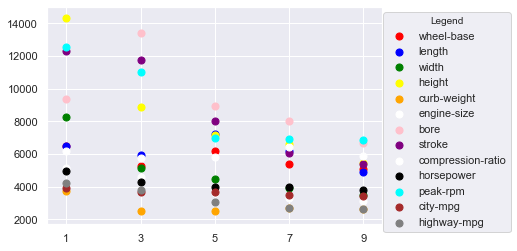

In [12]:
hyperparams = list(range(1,11,2))

fig, ax = plt.subplots()
ax.set_xticks(hyperparams)
colours = ['red', 'blue', 'green', 'yellow', 'orange', 'white', 'pink', 'purple'
          , 'white', 'black', 'cyan', 'brown', 'grey']
    
for index, col in enumerate(numeric_cols):
    col_rmse = []
    for i in hyperparams:
        rmse = knn_train_test(col, 'price', updated_cars, i)
        col_rmse.append(rmse)
    
    scatter = ax.scatter(hyperparams, col_rmse, s=50, c=colours[index], label=col)
    legend = ax.legend(numeric_cols, title="Legend", bbox_to_anchor=(1.4,1))
    


### Multivariate Model

In [13]:
def knn_train_test_m(training_cols, target_col, data, k):
    three_quarters_data = int(round(len(data) * 0.75))
    train_data = data[:three_quarters_data] 
    test_data = data[three_quarters_data:]
    
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(train_data[training_cols], train_data[target_col])
    predictions = knn.predict(test_data[training_cols])
    rmse = mean_squared_error(test_data[target_col], predictions)**(1/2)
    
    return rmse    

#### 2 Features

In [14]:
two_features = ['curb-weight', 'highway-mpg']
rmse = knn_train_test_m(two_features, 'price', updated_cars, 5)
print(rmse)

2756.3404598126112


#### 3 Features

In [15]:
three_features = ['curb-weight', 'highway-mpg', 'compression-ratio']
rmse = knn_train_test_m(three_features, 'price', updated_cars, 5)
print(rmse)

3275.865568914573


#### 4 Features

In [16]:
four_features = ['curb-weight', 'highway-mpg', 'compression-ratio', 'city-mpg']
rmse = knn_train_test_m(four_features, 'price', updated_cars, 5)
print(rmse)

2733.700379631974


#### 5 Features

In [17]:
five_features = ['curb-weight', 'highway-mpg', 'compression-ratio', 'city-mpg', 'horsepower']
rmse = knn_train_test_m(five_features, 'price', updated_cars, 5)
print(rmse)

2776.220361138503


**4 Features has the best RMSE!** 

#### Hyperparameter Optimisation

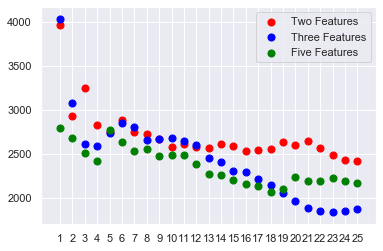

In [18]:
hyperparams = list(range(1,26))
colours = ['red', 'blue', 'green']
labels = ['Two Features', 'Three Features', 'Five Features']

list_of_features_lists = [two_features, four_features, five_features]
for index, f_list in enumerate(list_of_features_lists):
    features_rmse = []
    for hp in hyperparams:
        rmse = knn_train_test_m(f_list, 'price', updated_cars, hp)
        features_rmse.append(rmse)
    plt.scatter(hyperparams, features_rmse, s=50, c=colours[index], label=labels[index])
    plt.xticks(hyperparams)
    plt.legend()

#### Summary
With higher k values (number of nearest neighbours) i.e. >20 the three features model performs better. Below that though the model with five features performs better. This may be because at higher k-values more cars are factored into the model thus meaning the precited price will fall within a greater range & that five features provided too much variance. Where as the three features model limits the variance thus lea